In [1105]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
df = pd.read_csv("C:/Users/pere amat/CE/PROYECTO/DATAS/CANCIONES/dataset.csv")
print(df.head())


   Unnamed: 0                track_id                 artists  \
0           0  5SuOikwiRyPMVoIQDJUgSV             Gen Hoshino   
1           1  4qPNDBW1i3p13qLCt0Ki3A            Ben Woodward   
2           2  1iJBSr7s7jYXzM8EGcbK5b  Ingrid Michaelson;ZAYN   
3           3  6lfxq3CG4xtTiEg7opyCyx            Kina Grannis   
4           4  5vjLSffimiIP26QG5WcN2K        Chord Overstreet   

                                          album_name  \
0                                             Comedy   
1                                   Ghost (Acoustic)   
2                                     To Begin Again   
3  Crazy Rich Asians (Original Motion Picture Sou...   
4                                            Hold On   

                   track_name  popularity  duration_ms  explicit  \
0                      Comedy          73       230666     False   
1            Ghost - Acoustic          55       149610     False   
2              To Begin Again          57       210826     False   


# EDA

In [1107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114000 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        114000 non-null  int64  
 1   track_id          114000 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        114000 non-null  int64  
 6   duration_ms       114000 non-null  int64  
 7   explicit          114000 non-null  bool   
 8   danceability      114000 non-null  float64
 9   energy            114000 non-null  float64
 10  key               114000 non-null  int64  
 11  loudness          114000 non-null  float64
 12  mode              114000 non-null  int64  
 13  speechiness       114000 non-null  float64
 14  acousticness      114000 non-null  float64
 15  instrumentalness  114000 non-null  float64
 16  liveness          11

In [1108]:
df.describe()

,Unnamed: 0,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,56999.500000,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,32909.109681,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28499.750000,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,56999.500000,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,85499.250000,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,113999.000000,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


## ELIMINACION DUPLICADOS

In [1110]:
# Eliminar duplicados en la columna track_name, manteniendo el primer registro
df_new = df.drop_duplicates(subset='track_name', keep='first')


In [1111]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73609 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        73609 non-null  int64  
 1   track_id          73609 non-null  object 
 2   artists           73608 non-null  object 
 3   album_name        73608 non-null  object 
 4   track_name        73608 non-null  object 
 5   popularity        73609 non-null  int64  
 6   duration_ms       73609 non-null  int64  
 7   explicit          73609 non-null  bool   
 8   danceability      73609 non-null  float64
 9   energy            73609 non-null  float64
 10  key               73609 non-null  int64  
 11  loudness          73609 non-null  float64
 12  mode              73609 non-null  int64  
 13  speechiness       73609 non-null  float64
 14  acousticness      73609 non-null  float64
 15  instrumentalness  73609 non-null  float64
 16  liveness          73609 non-null  float64
 1

## ELIMINACIÓN VALORES NULOS y campos

In [1113]:
# Eliminar registros con valores vacíos
df_new = df_new.dropna()
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73608 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        73608 non-null  int64  
 1   track_id          73608 non-null  object 
 2   artists           73608 non-null  object 
 3   album_name        73608 non-null  object 
 4   track_name        73608 non-null  object 
 5   popularity        73608 non-null  int64  
 6   duration_ms       73608 non-null  int64  
 7   explicit          73608 non-null  bool   
 8   danceability      73608 non-null  float64
 9   energy            73608 non-null  float64
 10  key               73608 non-null  int64  
 11  loudness          73608 non-null  float64
 12  mode              73608 non-null  int64  
 13  speechiness       73608 non-null  float64
 14  acousticness      73608 non-null  float64
 15  instrumentalness  73608 non-null  float64
 16  liveness          73608 non-null  float64
 1

In [1114]:
# Eliminar una columna sin modificar el DataFrame original
df_new = df_new.drop(columns=["Unnamed: 0"])


In [1115]:
# Frecuencia de cada valor
print(df_new["popularity"].value_counts())


popularity
0      4818
21     2032
22     1999
23     1823
20     1817
       ... 
96        2
100       1
99        1
95        1
94        1
Name: count, Length: 101, dtype: int64


## VISUALIZACIONES

## Histograma y Boxplot

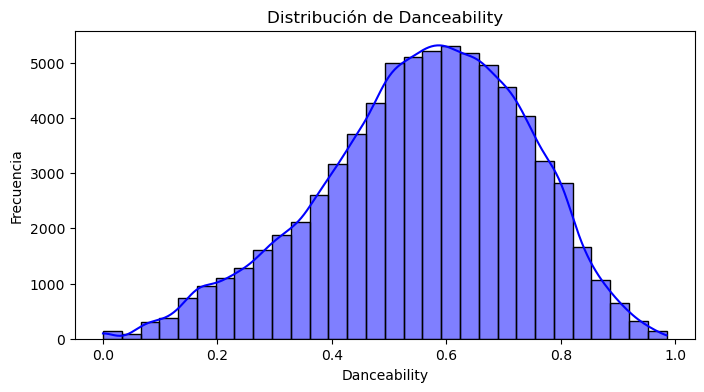

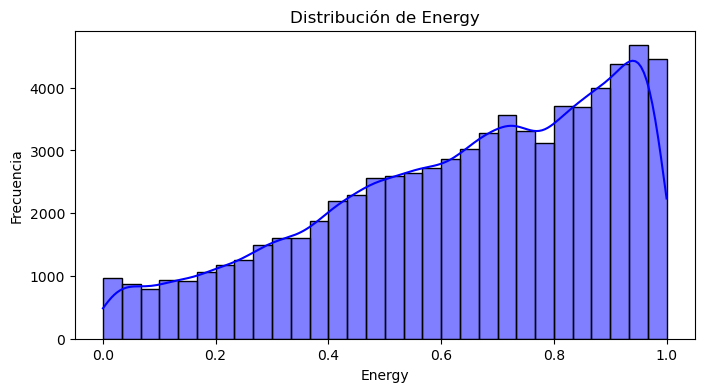

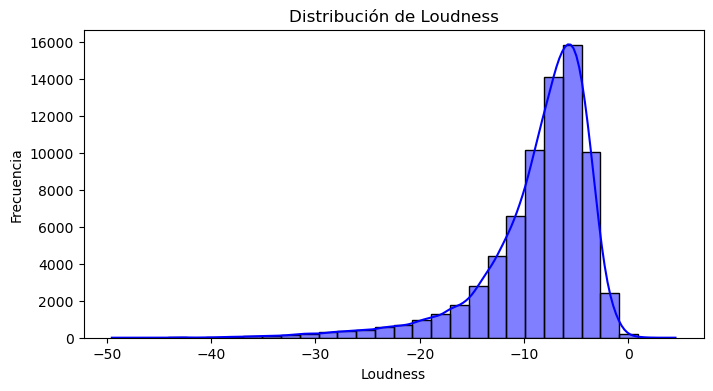

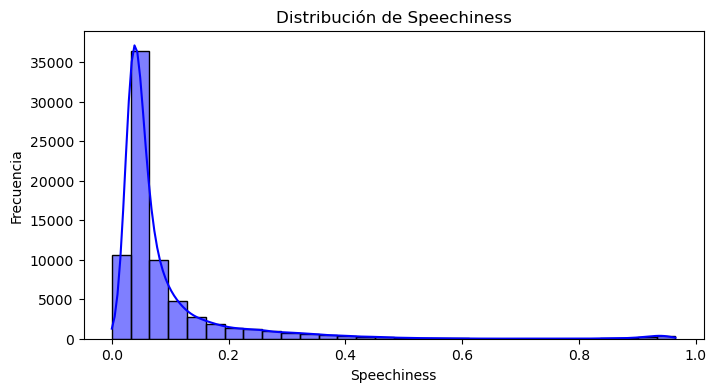

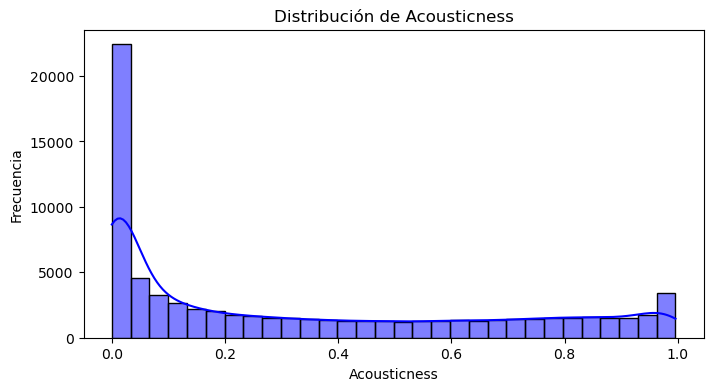

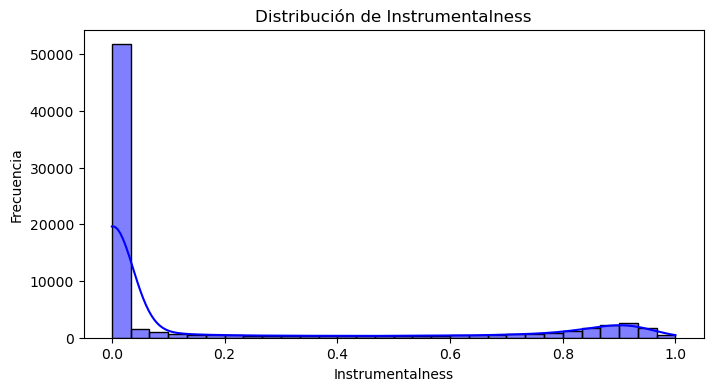

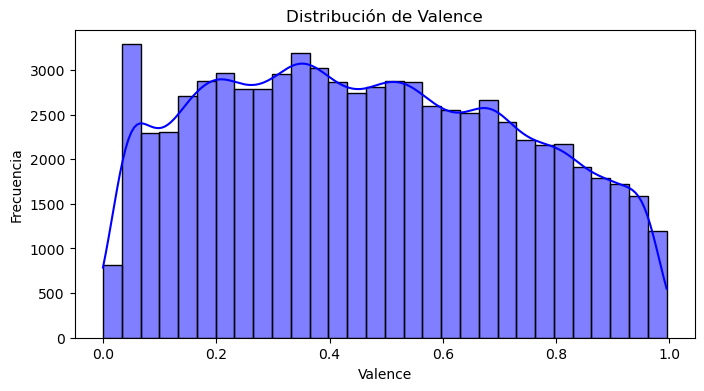

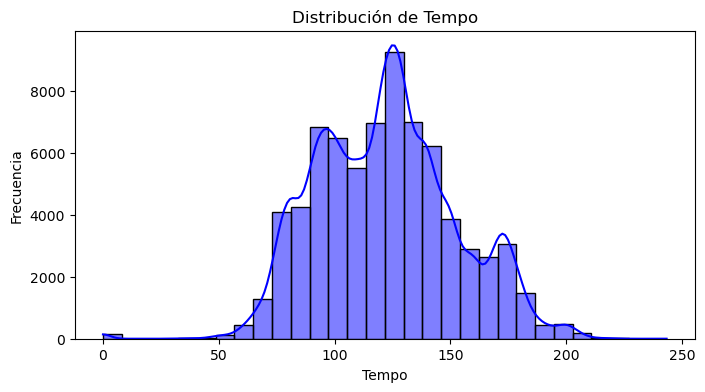

In [1118]:
# Características a analizar
features = ['danceability', 'energy', 'loudness', 'speechiness', 
            'acousticness', 'instrumentalness', 'valence', 'tempo']

# Crear histogramas
for feature in features:
    plt.figure(figsize=(8, 4))
    sns.histplot(df_new[feature], kde=True, bins=30, color='blue')
    plt.title(f"Distribución de {feature.capitalize()}")
    plt.xlabel(feature.capitalize())
    plt.ylabel("Frecuencia")
    plt.show()

## Relaciones entre Variables


## matriz de correlacion

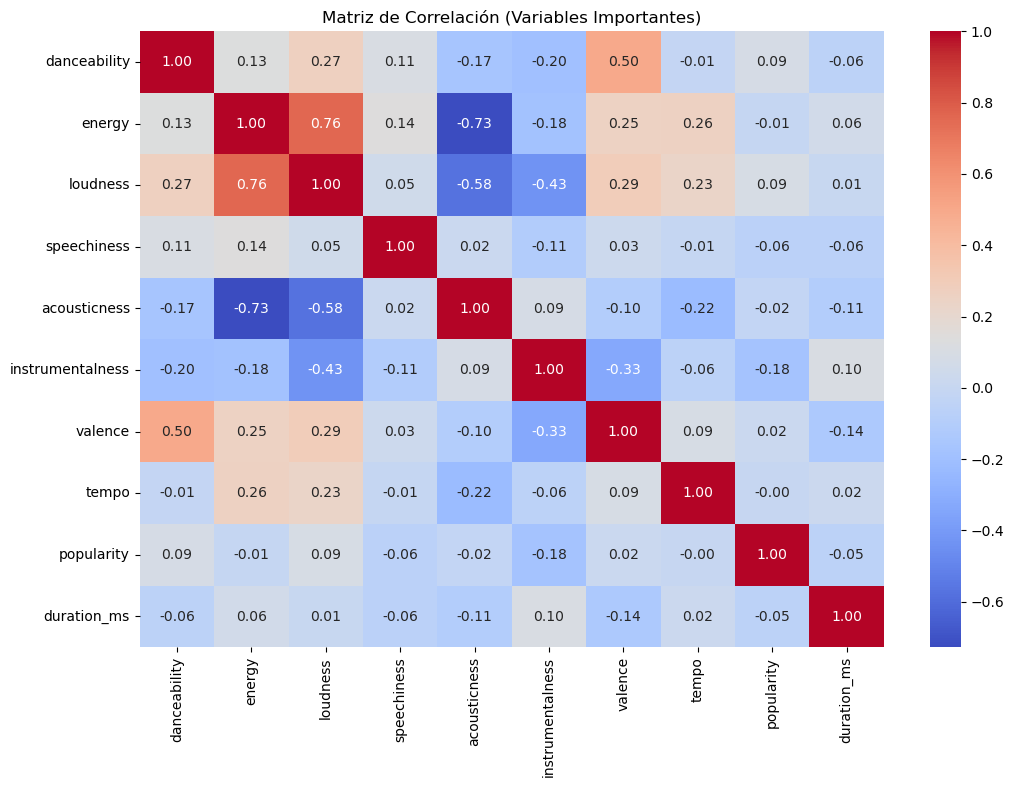

In [1121]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar columnas numéricas importantes
important_features = ['danceability', 'energy', 'loudness', 
                      'speechiness', 'acousticness', 'instrumentalness', 
                      'valence', 'tempo', 'popularity', 'duration_ms']

# Calcular la matriz de correlación
correlation_matrix = df_new[important_features].corr()

# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlación (Variables Importantes)")
plt.show()


## Join dataset

In [1123]:
df_join = pd.read_csv("C:/Users/pere amat/CE/PROYECTO/DATAS/CANCIONES/spotify_data_12_20_2023.csv")

C:\Users\pere amat\AppData\Local\Temp\ipykernel_29280\2787189089.py:1: DtypeWarning: Columns (25,26,44) have mixed types. Specify dtype option on import or set low_memory=False.
  df_join = pd.read_csv("C:/Users/pere amat/CE/PROYECTO/DATAS/CANCIONES/spotify_data_12_20_2023.csv")


In [1124]:
# Valores únicos ordenados
print(sorted(df_join["track_popularity"].unique()))


[0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, nan, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0]


In [1125]:
# Frecuencia de cada valor
print(df_join["track_popularity"].value_counts())


track_popularity
0.0     147239
1.0      28123
2.0      17820
3.0      13677
4.0      10675
         ...  
99.0         2
95.0         1
98.0         1
96.0         1
97.0         1
Name: count, Length: 100, dtype: int64


In [1126]:
df_join.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375141 entries, 0 to 375140
Data columns (total 49 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   album_id           375141 non-null  object 
 1   album_name         375140 non-null  object 
 2   album_popularity   375141 non-null  int64  
 3   album_type         375141 non-null  object 
 4   artists            375141 non-null  object 
 5   artist_0           375139 non-null  object 
 6   artist_1           87079 non-null   object 
 7   artist_2           38300 non-null   object 
 8   artist_3           13823 non-null   object 
 9   artist_4           6087 non-null    object 
 10  artist_id          375141 non-null  object 
 11  duration_sec       375141 non-null  float64
 12  label              375089 non-null  object 
 13  release_date       375119 non-null  object 
 14  total_tracks       375141 non-null  int64  
 15  track_id           375141 non-null  object 
 16  tr

## Elimninación campos innecesarios

In [1128]:
# Listar las columnas que NO necesitas
columns_to_drop = [
    "album_id","album_popularity", "artist_0", "artist_1", "artist_2", "artist_3", "artist_4", 
    "artist_id", "label", "release_date", "total_tracks", "track_number",
   "artist_genres", "genre_1", "genre_2", "genre_3", "genre_4", "analysis_url", "track_href", "type", "uri", "name", 
    "rn", "followers", "artist_popularity", "release_month", "release_year","duration_sec"
]

# Eliminar las columnas no deseadas
df_cleaned = df_join.drop(columns=columns_to_drop, errors="ignore")

In [1129]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375141 entries, 0 to 375140
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   album_name        375140 non-null  object 
 1   album_type        375141 non-null  object 
 2   artists           375141 non-null  object 
 3   track_id          375141 non-null  object 
 4   track_name        375136 non-null  object 
 5   genre_0           209863 non-null  object 
 6   acousticness      374364 non-null  float64
 7   danceability      374364 non-null  float64
 8   duration_ms       374364 non-null  float64
 9   energy            374364 non-null  float64
 10  instrumentalness  374364 non-null  float64
 11  key               374364 non-null  float64
 12  liveness          374364 non-null  float64
 13  loudness          374364 non-null  float64
 14  mode              374364 non-null  float64
 15  speechiness       374364 non-null  float64
 16  tempo             37

## Eliminar Registros Con valores vacíos

In [1131]:
# Eliminar registros con valores vacíos
df_cleaned = df_cleaned.dropna()
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 209362 entries, 334 to 375140
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   album_name        209362 non-null  object 
 1   album_type        209362 non-null  object 
 2   artists           209362 non-null  object 
 3   track_id          209362 non-null  object 
 4   track_name        209362 non-null  object 
 5   genre_0           209362 non-null  object 
 6   acousticness      209362 non-null  float64
 7   danceability      209362 non-null  float64
 8   duration_ms       209362 non-null  float64
 9   energy            209362 non-null  float64
 10  instrumentalness  209362 non-null  float64
 11  key               209362 non-null  float64
 12  liveness          209362 non-null  float64
 13  loudness          209362 non-null  float64
 14  mode              209362 non-null  float64
 15  speechiness       209362 non-null  float64
 16  tempo             20936

## Eliminar valores duplicados

In [1133]:
# Eliminar duplicados en la columna track_name, manteniendo el primer registro
df_cleaned = df_cleaned.drop_duplicates(subset='track_name', keep='first')


In [1134]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158623 entries, 334 to 375139
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   album_name        158623 non-null  object 
 1   album_type        158623 non-null  object 
 2   artists           158623 non-null  object 
 3   track_id          158623 non-null  object 
 4   track_name        158623 non-null  object 
 5   genre_0           158623 non-null  object 
 6   acousticness      158623 non-null  float64
 7   danceability      158623 non-null  float64
 8   duration_ms       158623 non-null  float64
 9   energy            158623 non-null  float64
 10  instrumentalness  158623 non-null  float64
 11  key               158623 non-null  float64
 12  liveness          158623 non-null  float64
 13  loudness          158623 non-null  float64
 14  mode              158623 non-null  float64
 15  speechiness       158623 non-null  float64
 16  tempo             15862

## Rename Campos y Transformaci´´on datos para join

0   Unnamed: 0        73608 non-null  int64  
 1   track_id          73608 non-null  object 
 2   artists           73608 non-null  object 
 3   album_name        73608 non-null  object 
 4   track_name        73608 non-null  object 
 5   popularity        73608 non-null  int64  
 6   duration_ms       73608 non-null  int64  
 7   explicit          73608 non-null  bool   
 8   danceability      73608 non-null  float64
 9   energy            73608 non-null  float64
 10  key               73608 non-null  int64  
 11  loudness          73608 non-null  float64
 12  mode              73608 non-null  int64  
 13  speechiness       73608 non-null  float64
 14  acousticness      73608 non-null  float64
 15  instrumentalness  73608 non-null  float64
 16  liveness          73608 non-null  float64
 17  valence           73608 non-null  float64
 18  tempo             73608 non-null  float64
 19  time_signature    73608 non-null  int64  
 20  track_genre       73608 non-null  object 

In [1137]:
# Cambiar el nombre de una columna
df_cleaned = df_cleaned.rename(columns={"track_popularity": "popularity"})
df_cleaned = df_cleaned.rename(columns={"genre_0": "track_genre"})

In [1138]:
df_cleaned.head()

,album_name,album_type,artists,track_id,track_name,track_genre,acousticness,danceability,duration_ms,energy,...,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence,explicit,popularity
334,Man Up High,single,"['dav', 'Brandyn Burnette']",5vW6hFJrQT90CT4yoNiMWn,Man Up High,indie hip hop,0.069000,0.460,227184.0,0.771,...,5.0,0.2860,-5.303,0.0,0.1230,100.445,4.0,0.522,False,9.0
356,Demo 2021,single,['Bust'],0gDQFz1el7GkcAqBbSCGXX,It'S Not Right,australian hardcore,0.000014,0.179,58101.0,0.880,...,0.0,0.2180,-5.537,0.0,0.0724,177.591,4.0,0.601,False,0.0
357,Demo 2021,single,['Bust'],0xzXXB4tyXcKovNpUaxZ5q,Backfoot,australian hardcore,0.000034,0.264,46944.0,0.967,...,2.0,0.3810,-6.246,1.0,0.1220,87.023,4.0,0.160,False,1.0
358,Demo 2021,single,['Bust'],50NUoDezRYFkxrZFlQvEMl,No More Bros,australian hardcore,0.001330,0.311,112656.0,0.829,...,4.0,0.0975,-6.060,1.0,0.0922,101.667,3.0,0.511,False,1.0
359,Demo 2021,single,['Bust'],44uSlIKtJomBszdWRZoS9L,Y.T.A.,australian hardcore,0.000145,0.306,94432.0,0.881,...,1.0,0.1720,-5.681,0.0,0.0829,87.207,3.0,0.603,False,0.0


In [1139]:
df_cleaned = df_cleaned.drop(columns=["album_type"])

## Modificar [] campo Artists

In [1141]:
# Convertir la lista de artistas en una cadena separada por ";"
df_cleaned['artists'] = df_cleaned['artists'].apply(lambda x: ";".join(eval(x)) if isinstance(x, str) and x.startswith("[") else x)

In [1142]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 158623 entries, 334 to 375139
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   album_name        158623 non-null  object 
 1   artists           158623 non-null  object 
 2   track_id          158623 non-null  object 
 3   track_name        158623 non-null  object 
 4   track_genre       158623 non-null  object 
 5   acousticness      158623 non-null  float64
 6   danceability      158623 non-null  float64
 7   duration_ms       158623 non-null  float64
 8   energy            158623 non-null  float64
 9   instrumentalness  158623 non-null  float64
 10  key               158623 non-null  float64
 11  liveness          158623 non-null  float64
 12  loudness          158623 non-null  float64
 13  mode              158623 non-null  float64
 14  speechiness       158623 non-null  float64
 15  tempo             158623 non-null  float64
 16  time_signature    15862

In [1143]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Index: 73608 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   track_id          73608 non-null  object 
 1   artists           73608 non-null  object 
 2   album_name        73608 non-null  object 
 3   track_name        73608 non-null  object 
 4   popularity        73608 non-null  int64  
 5   duration_ms       73608 non-null  int64  
 6   explicit          73608 non-null  bool   
 7   danceability      73608 non-null  float64
 8   energy            73608 non-null  float64
 9   key               73608 non-null  int64  
 10  loudness          73608 non-null  float64
 11  mode              73608 non-null  int64  
 12  speechiness       73608 non-null  float64
 13  acousticness      73608 non-null  float64
 14  instrumentalness  73608 non-null  float64
 15  liveness          73608 non-null  float64
 16  valence           73608 non-null  float64
 1

## JOIN SIN PERDER DATOS , Y INSERTAR NUEVOS DATOS SOLO CON MERGE.

In [1145]:
# Combinar df_new y las filas adicionales de df_cleaned
df_combined = pd.concat([df_new, df_cleaned]).drop_duplicates(subset="track_id", keep="first")


In [1146]:
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 231068 entries, 0 to 375139
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          231068 non-null  object 
 1   artists           231068 non-null  object 
 2   album_name        231068 non-null  object 
 3   track_name        231068 non-null  object 
 4   popularity        231068 non-null  float64
 5   duration_ms       231068 non-null  float64
 6   explicit          231068 non-null  object 
 7   danceability      231068 non-null  float64
 8   energy            231068 non-null  float64
 9   key               231068 non-null  float64
 10  loudness          231068 non-null  float64
 11  mode              231068 non-null  float64
 12  speechiness       231068 non-null  float64
 13  acousticness      231068 non-null  float64
 14  instrumentalness  231068 non-null  float64
 15  liveness          231068 non-null  float64
 16  valence           231068 

In [1147]:
# Valores únicos en 'popularity'
print(df_combined["popularity"].unique())
# Frecuencia de cada valor
print(df_combined["popularity"].value_counts())


[ 73.  55.  57.  71.  82.  58.  74.  80.  56.  69.  52.  62.  54.  67.
  63.   0.   1.  46.  61.  60.  68.  51.  75.  66.  64.  65.  44.  70.
  45.  50.  59.  49.  53.  47.  43.  42.  20.  22.  35.  19.  24.  18.
  23.  40.  38.  41.  30.  37.  39.  48.  36.  34.  26.  32.  33.  21.
  31.  28.  29.  27.  25.  16.   3.  12.  10.   9.  11.  17.   8.  15.
  87.  83.  86.  93.  76.  78.   4.   2.   5.  84.  72.  79.  77.  81.
  85.   6.   7.  13.  14. 100.  98.  89.  92.  90.  88.  91.  99.  97.
  95.  96.  94.]
popularity
0.0      45922
1.0      11436
2.0       7767
3.0       6248
4.0       5234
         ...  
97.0         3
96.0         3
95.0         2
100.0        1
99.0         1
Name: count, Length: 101, dtype: int64


## Join2

In [1149]:
df_join2 = pd.read_csv("spotify_data.csv")

In [1150]:
df_join2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1159764 entries, 0 to 1159763
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1159764 non-null  int64  
 1   artist_name       1159749 non-null  object 
 2   track_name        1159763 non-null  object 
 3   track_id          1159764 non-null  object 
 4   popularity        1159764 non-null  int64  
 5   year              1159764 non-null  int64  
 6   genre             1159764 non-null  object 
 7   danceability      1159764 non-null  float64
 8   energy            1159764 non-null  float64
 9   key               1159764 non-null  int64  
 10  loudness          1159764 non-null  float64
 11  mode              1159764 non-null  int64  
 12  speechiness       1159764 non-null  float64
 13  acousticness      1159764 non-null  float64
 14  instrumentalness  1159764 non-null  float64
 15  liveness          1159764 non-null  float64
 16  

## Eliminar registros con valores vacíos

In [1152]:
# Eliminar registros con valores vacíos
df_join2 = df_join2.dropna()
df_join2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1159748 entries, 0 to 1159763
Data columns (total 20 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Unnamed: 0        1159748 non-null  int64  
 1   artist_name       1159748 non-null  object 
 2   track_name        1159748 non-null  object 
 3   track_id          1159748 non-null  object 
 4   popularity        1159748 non-null  int64  
 5   year              1159748 non-null  int64  
 6   genre             1159748 non-null  object 
 7   danceability      1159748 non-null  float64
 8   energy            1159748 non-null  float64
 9   key               1159748 non-null  int64  
 10  loudness          1159748 non-null  float64
 11  mode              1159748 non-null  int64  
 12  speechiness       1159748 non-null  float64
 13  acousticness      1159748 non-null  float64
 14  instrumentalness  1159748 non-null  float64
 15  liveness          1159748 non-null  float64
 16  valen

## Eliminar duplicados en la columna track_name, manteniendo el primer registro

In [1154]:
# Eliminar duplicados en la columna track_name, manteniendo el primer registro
df_join2 = df_join2.drop_duplicates(subset='track_name', keep='first')
df_join2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 882349 entries, 0 to 1159763
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Unnamed: 0        882349 non-null  int64  
 1   artist_name       882349 non-null  object 
 2   track_name        882349 non-null  object 
 3   track_id          882349 non-null  object 
 4   popularity        882349 non-null  int64  
 5   year              882349 non-null  int64  
 6   genre             882349 non-null  object 
 7   danceability      882349 non-null  float64
 8   energy            882349 non-null  float64
 9   key               882349 non-null  int64  
 10  loudness          882349 non-null  float64
 11  mode              882349 non-null  int64  
 12  speechiness       882349 non-null  float64
 13  acousticness      882349 non-null  float64
 14  instrumentalness  882349 non-null  float64
 15  liveness          882349 non-null  float64
 16  valence           882349

In [1155]:
df_join2 = df_join2.drop(columns=["Unnamed: 0"])
df_join2 = df_join2.drop(columns=["year"])

In [1156]:
df_join2.head()

,artist_name,track_name,track_id,popularity,genre,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,Jason Mraz,I Won't Give Up,53QF56cjZA9RTuuMZDrSA6,68,acoustic,0.483,0.303,4,-10.058,1,0.0429,0.6940,0.000000,0.1150,0.139,133.406,240166,3
1,Jason Mraz,93 Million Miles,1s8tP3jP4GZcyHDsjvw218,50,acoustic,0.572,0.454,3,-10.286,1,0.0258,0.4770,0.000014,0.0974,0.515,140.182,216387,4
2,Joshua Hyslop,Do Not Let Me Go,7BRCa8MPiyuvr2VU3O9W0F,57,acoustic,0.409,0.234,3,-13.711,1,0.0323,0.3380,0.000050,0.0895,0.145,139.832,158960,4
3,Boyce Avenue,Fast Car,63wsZUhUZLlh1OsyrZq7sz,58,acoustic,0.392,0.251,10,-9.845,1,0.0363,0.8070,0.000000,0.0797,0.508,204.961,304293,4
4,Andrew Belle,Sky's Still Blue,6nXIYClvJAfi6ujLiKqEq8,54,acoustic,0.430,0.791,6,-5.419,0,0.0302,0.0726,0.019300,0.1100,0.217,171.864,244320,4


In [1157]:
df_combined.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73.0,230666.0,False,0.676,0.4610,1.0,-6.746,0.0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4.0,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55.0,149610.0,False,0.420,0.1660,1.0,-17.235,1.0,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4.0,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57.0,210826.0,False,0.438,0.3590,0.0,-9.734,1.0,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4.0,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71.0,201933.0,False,0.266,0.0596,0.0,-18.515,1.0,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3.0,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82.0,198853.0,False,0.618,0.4430,2.0,-9.681,1.0,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4.0,acoustic


In [1158]:
df_join2 = df_join2.rename(columns={"genre": "track_genre"})
df_join2 = df_join2.rename(columns={"artist_name": "artists"})

In [1159]:

df_combined = df_combined.drop(columns=["explicit"])
df_combined = df_combined.drop(columns=["album_name"])
df_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 231068 entries, 0 to 375139
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          231068 non-null  object 
 1   artists           231068 non-null  object 
 2   track_name        231068 non-null  object 
 3   popularity        231068 non-null  float64
 4   duration_ms       231068 non-null  float64
 5   danceability      231068 non-null  float64
 6   energy            231068 non-null  float64
 7   key               231068 non-null  float64
 8   loudness          231068 non-null  float64
 9   mode              231068 non-null  float64
 10  speechiness       231068 non-null  float64
 11  acousticness      231068 non-null  float64
 12  instrumentalness  231068 non-null  float64
 13  liveness          231068 non-null  float64
 14  valence           231068 non-null  float64
 15  tempo             231068 non-null  float64
 16  time_signature    231068 

In [1160]:
df_join2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 882349 entries, 0 to 1159763
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           882349 non-null  object 
 1   track_name        882349 non-null  object 
 2   track_id          882349 non-null  object 
 3   popularity        882349 non-null  int64  
 4   track_genre       882349 non-null  object 
 5   danceability      882349 non-null  float64
 6   energy            882349 non-null  float64
 7   key               882349 non-null  int64  
 8   loudness          882349 non-null  float64
 9   mode              882349 non-null  int64  
 10  speechiness       882349 non-null  float64
 11  acousticness      882349 non-null  float64
 12  instrumentalness  882349 non-null  float64
 13  liveness          882349 non-null  float64
 14  valence           882349 non-null  float64
 15  tempo             882349 non-null  float64
 16  duration_ms       882349

## Modificación Dtype

In [1162]:
# Cambiar los tipos de datos en df_additional
df_join2["popularity"] = df_join2["popularity"].astype(float)
df_join2["key"] = df_join2["key"].astype(float)
df_join2["mode"] = df_join2["mode"].astype(float)
df_join2["duration_ms"] = df_join2["duration_ms"].astype(float)
df_join2["time_signature"] = df_join2["time_signature"].astype(float)

# Verificar nuevamente los tipos de datos
df_join2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 882349 entries, 0 to 1159763
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   artists           882349 non-null  object 
 1   track_name        882349 non-null  object 
 2   track_id          882349 non-null  object 
 3   popularity        882349 non-null  float64
 4   track_genre       882349 non-null  object 
 5   danceability      882349 non-null  float64
 6   energy            882349 non-null  float64
 7   key               882349 non-null  float64
 8   loudness          882349 non-null  float64
 9   mode              882349 non-null  float64
 10  speechiness       882349 non-null  float64
 11  acousticness      882349 non-null  float64
 12  instrumentalness  882349 non-null  float64
 13  liveness          882349 non-null  float64
 14  valence           882349 non-null  float64
 15  tempo             882349 non-null  float64
 16  duration_ms       882349

## Join  2

In [1164]:
# Combinar df_new y las filas adicionales de df_cleaned
df_combined2 = pd.concat([df_combined, df_join2]).drop_duplicates(subset="track_id", keep="first")

In [1165]:
df_combined2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1075467 entries, 0 to 1159763
Data columns (total 18 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   track_id          1075467 non-null  object 
 1   artists           1075467 non-null  object 
 2   track_name        1075467 non-null  object 
 3   popularity        1075467 non-null  float64
 4   duration_ms       1075467 non-null  float64
 5   danceability      1075467 non-null  float64
 6   energy            1075467 non-null  float64
 7   key               1075467 non-null  float64
 8   loudness          1075467 non-null  float64
 9   mode              1075467 non-null  float64
 10  speechiness       1075467 non-null  float64
 11  acousticness      1075467 non-null  float64
 12  instrumentalness  1075467 non-null  float64
 13  liveness          1075467 non-null  float64
 14  valence           1075467 non-null  float64
 15  tempo             1075467 non-null  float64
 16  time_

In [1166]:
# Eliminar registros donde 'popularity' es menor que 50
df_combined2 = df_combined2[df_combined2["popularity"] >= 40]
df_combined2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121992 entries, 0 to 1159051
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          121992 non-null  object 
 1   artists           121992 non-null  object 
 2   track_name        121992 non-null  object 
 3   popularity        121992 non-null  float64
 4   duration_ms       121992 non-null  float64
 5   danceability      121992 non-null  float64
 6   energy            121992 non-null  float64
 7   key               121992 non-null  float64
 8   loudness          121992 non-null  float64
 9   mode              121992 non-null  float64
 10  speechiness       121992 non-null  float64
 11  acousticness      121992 non-null  float64
 12  instrumentalness  121992 non-null  float64
 13  liveness          121992 non-null  float64
 14  valence           121992 non-null  float64
 15  tempo             121992 non-null  float64
 16  time_signature    121992

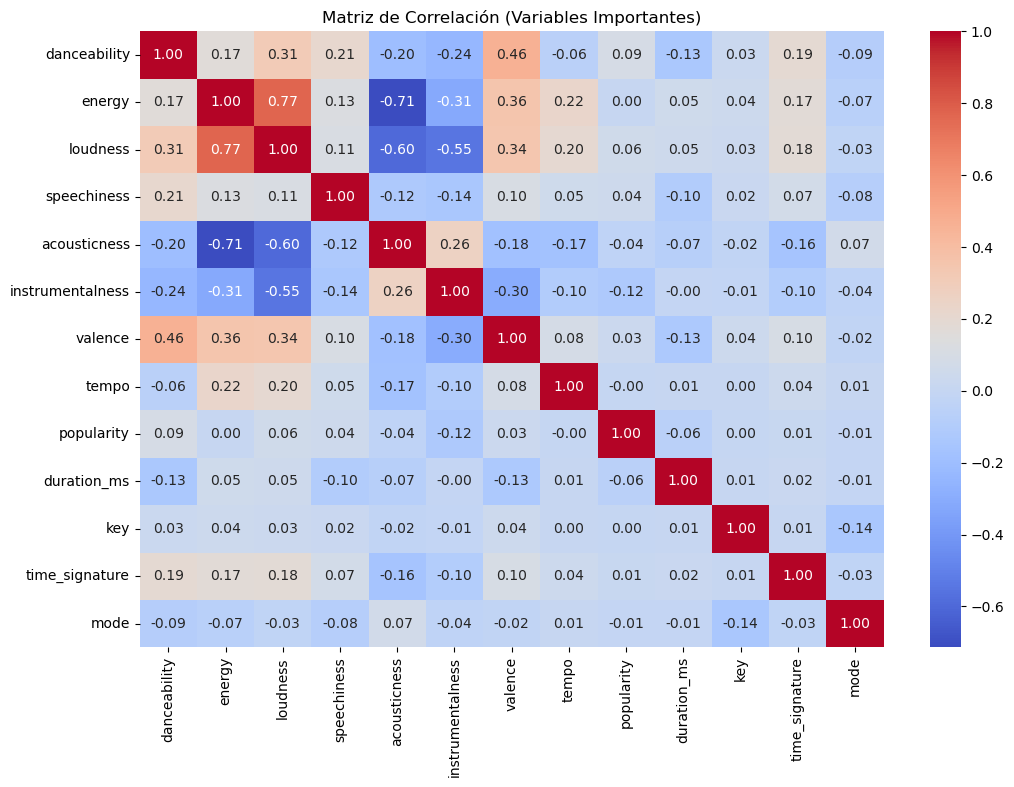

In [1167]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Seleccionar columnas numéricas importantes
important_features = ['danceability', 'energy', 'loudness', 
                      'speechiness', 'acousticness', 'instrumentalness', 
                      'valence', 'tempo', 'popularity', 'duration_ms','key','time_signature','mode']

# Calcular la matriz de correlación
correlation_matrix = df_combined2[important_features].corr()

# Visualizar la matriz de correlación como un mapa de calor
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Matriz de Correlación (Variables Importantes)")
plt.show()

## Clusters

### Las variables seleccionadas son:

#### danceability: Mide qué tan bailable es la canción.
#### energy: Representa la intensidad de la canción.
#### valence: Mide el estado de ánimo positivo/negativo de la canción.
#### tempo: Mide el ritmo de la canción.
#### acousticness: Indica cuán acústica es la canción.
#### instrumentalness: Indica si una canción es instrumental o no

## Paso 1: Preparar los Datos

In [1171]:
# Agrupar por 'track_genre' y calcular los promedios de las características relevantes
genre_features = df_combined2.groupby("track_genre")[["danceability", "energy", "valence", "tempo", "acousticness", "instrumentalness"]].mean()

# Verificar las características calculadas por género
print(genre_features.head())


                danceability    energy   valence       tempo  acousticness  \
track_genre                                                                  
5th wave emo        0.524000  0.384000  0.319000   90.027000      0.727000   
abstract            0.353333  0.563667  0.263633  106.463333      0.331308   
abstract beats      0.825000  0.888000  0.942000  105.020000      0.038500   
acid house          0.530000  0.860000  0.483000  125.075000      0.000027   
acid rock           0.436207  0.698597  0.577000  114.585069      0.198739   

                instrumentalness  
track_genre                       
5th wave emo            0.008660  
abstract                0.714333  
abstract beats          0.124000  
acid house              0.000359  
acid rock               0.148414  


## Paso 2: Normalizar las Características

In [1173]:
from sklearn.preprocessing import StandardScaler

# Normalizar las características
scaler = StandardScaler()
genre_features_scaled = scaler.fit_transform(genre_features)

# Verificar las dimensiones después de normalización
print("Tamaño del conjunto normalizado:", genre_features_scaled.shape)


Tamaño del conjunto normalizado: (1021, 6)


## Paso 3: Determinar el Número de Clusters

### el método del codo

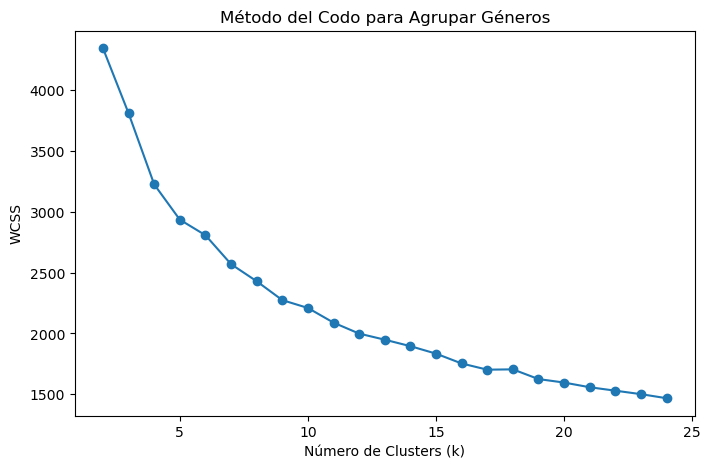

In [1176]:
from threadpoolctl import threadpool_limits

# Limitar los threads a 4
with threadpool_limits(limits=4):
    from sklearn.cluster import KMeans
    import matplotlib.pyplot as plt

    # Calcular WCSS para diferentes valores de k
    wcss = []
    for k in range(2, 25):  # Probar entre 2 y 24 clusters
        kmeans = KMeans(n_clusters=k, random_state=42)
        kmeans.fit(genre_features_scaled)
        wcss.append(kmeans.inertia_)

    # Graficar el método del codo
    plt.figure(figsize=(8, 5))
    plt.plot(range(2, 25), wcss, marker="o")
    plt.title("Método del Codo para Agrupar Géneros")
    plt.xlabel("Número de Clusters (k)")
    plt.ylabel("WCSS")
    plt.show()



El codo parece estar cerca de k = 5 o 6, ya que después de ese punto, la curva comienza a aplanarse y la disminución de WCSS no es tan significativa.
Sin embargo, si buscas una mayor granularidad (más grupos), k = 8 podría ser otra buena opción.

### "Silhouette Plot" o "Silhouette Score vs. Número de Clusters

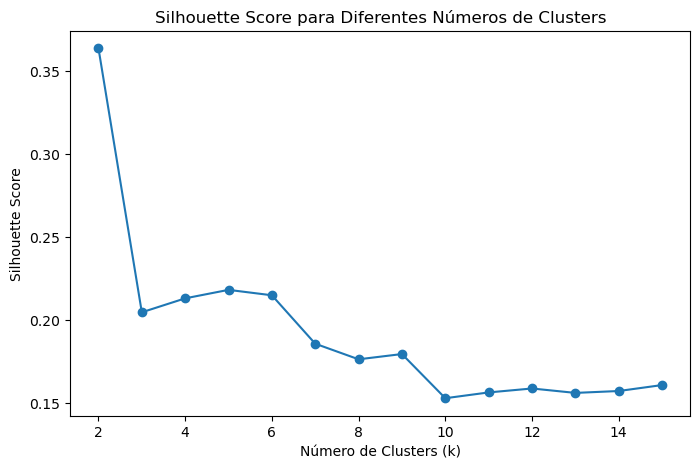

In [1179]:
from threadpoolctl import threadpool_limits
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Limitar los threads a 4
with threadpool_limits(limits=4):
    silhouette_scores = []
    for k in range(2, 16):  # Probar entre 2 y 15 clusters
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(genre_features_scaled)
        score = silhouette_score(genre_features_scaled, labels)
        silhouette_scores.append(score)

# Graficar el Silhouette Score
plt.figure(figsize=(8, 5))
plt.plot(range(2, 16), silhouette_scores, marker="o")
plt.title("Silhouette Score para Diferentes Números de Clusters")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Silhouette Score")
plt.show()


k = 2 tiene el puntaje más alto (~0.28), lo que indica que dos clusters son muy compactos y bien separados.
k = 3 y k = 4 también tienen valores relativamente altos (~0.22), aunque ligeramente más bajos que para k = 2.
A partir de k = 6, el puntaje disminuye consistentemente, lo que indica que los clusters se vuelven menos definido

### Davies-Bouldin Index Plot

Valores más bajos del índice indican mejores clusters.
Un valor bajo sugiere que los clusters son compactos y están bien separados.

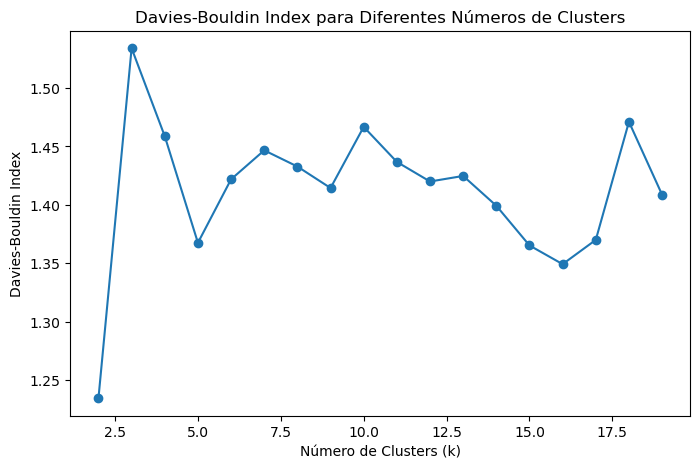

In [1183]:
from threadpoolctl import threadpool_limits
from sklearn.metrics import davies_bouldin_score
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Limitar los threads a 4
with threadpool_limits(limits=4):
    db_scores = []
    for k in range(2, 20):
        kmeans = KMeans(n_clusters=k, random_state=42)
        labels = kmeans.fit_predict(genre_features_scaled)
        score = davies_bouldin_score(genre_features_scaled, labels)
        db_scores.append(score)

# Graficar el Davies-Bouldin Index
plt.figure(figsize=(8, 5))
plt.plot(range(2, 20), db_scores, marker="o")
plt.title("Davies-Bouldin Index para Diferentes Números de Clusters")
plt.xlabel("Número de Clusters (k)")
plt.ylabel("Davies-Bouldin Index")
plt.show()



Valores más bajos del índice indican mejores clusters.
Aquí vemos claramente que:
k = 7 tiene el valor más bajo (~1.30), confirmando que este es el número óptimo de clusters según el Davies-Bouldin Index.
k = 4 o 5 también son alternativas razonables, ya que tienen índices relativamente bajos (~1.40 a 1.45).
Para k > 10, los valores se estabilizan pero no son mejores que los de k = 7.

## PORQUE 7 CLUSTERS?: 

Resumidamente, elegir 7 clusters es una buena decisión porque:

Equilibrio:

Ofrece un buen balance entre simplicidad (menos clusters) y granularidad (más detalle).
Captura patrones importantes sin hacer los grupos demasiado complejos.
Resultados Técnicos:

En el Davies-Bouldin Index, k = 7 tiene el índice más bajo (~1.30), lo que indica que los clusters son compactos y están bien separados.
El método del codo también mostró que k = 7 se encuentra en un buen punto antes de que las mejoras sean menos significativas.
Practicidad:

Tener 7 clusters permite identificar diferencias significativas en los datos sin redundancias ni pérdida de información.
Conclusión: 7 clusters es una elección sólida tanto técnica como práctica para tus datos.

## Paso 4: Crear Clusters para los Géneros

In [1187]:
!pip install clustering_algorithms



[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [1188]:
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Usar el número óptimo de clusters basado en el método del codo
optimal_k = 7  # Cambia según tu análisis

# Calcular pesos dinámicos suavizados, ajustando por densidad
densities = np.linalg.norm(genre_features_scaled, axis=1)  # Densidad basada en la distancia al origen
weights = 1 / (densities + 1e-5)  # Peso inverso a la densidad
weights = weights / weights.mean()  # Normalizar los pesos para evitar extremos

# Parámetros para refuerzo dinámico
max_iter = 10  # Número de iteraciones dinámicas
refuerzo_factor = 3  # Nivel de refuerzo
penalty_threshold = 0.2  # Porcentaje máximo para clusters grandes

# Iterar para ajustar los clusters dinámicamente
for iteration in range(max_iter):
    # Ajustar KMeans con los pesos actuales
    kmeans = KMeans(n_clusters=optimal_k, random_state=42, init="k-means++", max_iter=300)
    kmeans.fit(genre_features_scaled, sample_weight=weights)
    genre_clusters = kmeans.labels_
    
    # Agregar los clusters al DataFrame temporalmente
    genre_features["Cluster"] = genre_clusters
    
    # Verificar la distribución de clusters
    cluster_counts = genre_features["Cluster"].value_counts(normalize=True)
    print(f"Iteración {iteration + 1}: Distribución de clusters:")
    print(cluster_counts)
    
    # Detectar clusters problemáticos
    large_clusters = cluster_counts[cluster_counts > penalty_threshold].index
    small_clusters = cluster_counts[cluster_counts < penalty_threshold / optimal_k].index
    
    # Penalizar clusters grandes y reforzar clusters pequeños
  # Penalizar clusters grandes y reforzar clusters pequeños usando booleanos
for cluster_id in large_clusters:
    mask = genre_features["Cluster"] == cluster_id  # Máscara booleana
    weights[mask.to_numpy()] *= (1 / refuerzo_factor)  # Penalizar pesos

for cluster_id in small_clusters:
    mask = genre_features["Cluster"] == cluster_id  # Máscara booleana
    weights[mask.to_numpy()] *= refuerzo_factor  # Reforzar pesos

    
    # Normalizar los pesos nuevamente para evitar valores extremos
    weights = np.clip(weights, 0.5, 5)  # Limitar los pesos a un rango razonable
    weights = weights / weights.mean()  # Normalizar los pesos


Iteración 1: Distribución de clusters:
Cluster
4    0.215475
6    0.176298
0    0.169442
1    0.156709
3    0.122429
2    0.088149
5    0.071499
Name: proportion, dtype: float64
Iteración 2: Distribución de clusters:
Cluster
4    0.215475
6    0.176298
0    0.169442
1    0.156709
3    0.122429
2    0.088149
5    0.071499
Name: proportion, dtype: float64


C:\Users\pere amat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\pere amat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\pere amat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Iteración 3: Distribución de clusters:
Cluster
4    0.215475
6    0.176298
0    0.169442
1    0.156709
3    0.122429
2    0.088149
5    0.071499
Name: proportion, dtype: float64
Iteración 4: Distribución de clusters:
Cluster
4    0.215475
6    0.176298
0    0.169442
1    0.156709
3    0.122429
2    0.088149
5    0.071499
Name: proportion, dtype: float64
Iteración 5: Distribución de clusters:
Cluster
4    0.215475
6    0.176298
0    0.169442
1    0.156709
3    0.122429
2    0.088149
5    0.071499
Name: proportion, dtype: float64


C:\Users\pere amat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\pere amat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\pere amat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Iteración 6: Distribución de clusters:
Cluster
4    0.215475
6    0.176298
0    0.169442
1    0.156709
3    0.122429
2    0.088149
5    0.071499
Name: proportion, dtype: float64
Iteración 7: Distribución de clusters:
Cluster
4    0.215475
6    0.176298
0    0.169442
1    0.156709
3    0.122429
2    0.088149
5    0.071499
Name: proportion, dtype: float64
Iteración 8: Distribución de clusters:
Cluster
4    0.215475
6    0.176298
0    0.169442
1    0.156709
3    0.122429
2    0.088149
5    0.071499
Name: proportion, dtype: float64


C:\Users\pere amat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\pere amat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\pere amat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


Iteración 9: Distribución de clusters:
Cluster
4    0.215475
6    0.176298
0    0.169442
1    0.156709
3    0.122429
2    0.088149
5    0.071499
Name: proportion, dtype: float64
Iteración 10: Distribución de clusters:
Cluster
4    0.215475
6    0.176298
0    0.169442
1    0.156709
3    0.122429
2    0.088149
5    0.071499
Name: proportion, dtype: float64


C:\Users\pere amat\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


## Paso 5: Mapear los Clusters al DataFrame Principal

In [1190]:
# Crear un diccionario para mapear géneros a clusters
genre_to_cluster = genre_features["Cluster"].to_dict()

# Mapear cada género a su cluster en el DataFrame principal
df_combined2["SuperGenre"] = df_combined2["track_genre"].map(genre_to_cluster)

In [1191]:
df_combined2.head()

,track_id,artists,track_name,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,SuperGenre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,73.0,230666.0,0.676,0.4610,1.0,-6.746,0.0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4.0,acoustic,3
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost - Acoustic,55.0,149610.0,0.420,0.1660,1.0,-17.235,1.0,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4.0,acoustic,3
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,57.0,210826.0,0.438,0.3590,0.0,-9.734,1.0,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4.0,acoustic,3
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Can't Help Falling In Love,71.0,201933.0,0.266,0.0596,0.0,-18.515,1.0,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3.0,acoustic,3
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,82.0,198853.0,0.618,0.4430,2.0,-9.681,1.0,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4.0,acoustic,3


## Paso 7: Visualizar los Resultados

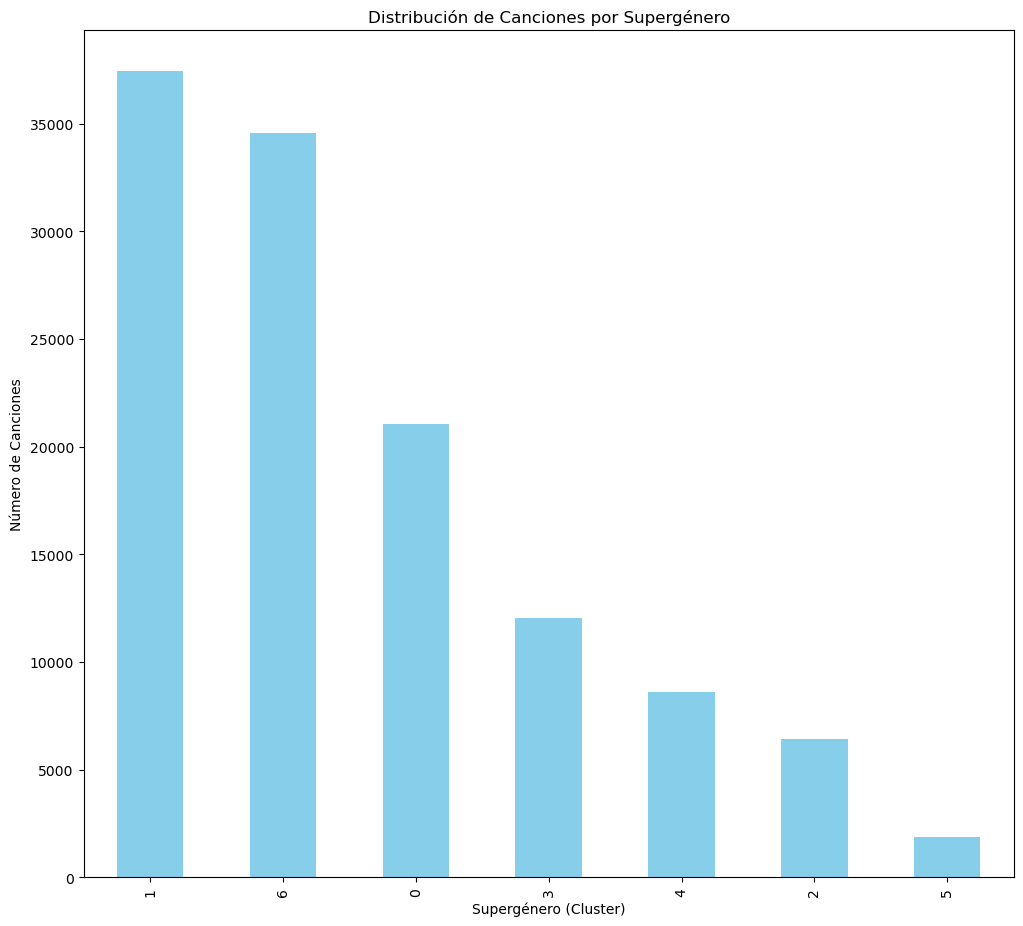

In [1193]:
# Distribución de canciones por cluster
df_combined2["SuperGenre"].value_counts().plot(kind="bar", figsize=(12, 11), color="skyblue")
plt.title("Distribución de Canciones por Supergénero")
plt.xlabel("Supergénero (Cluster)")
plt.ylabel("Número de Canciones")
plt.show()



## PASO 8Visualización en 2D con PCA

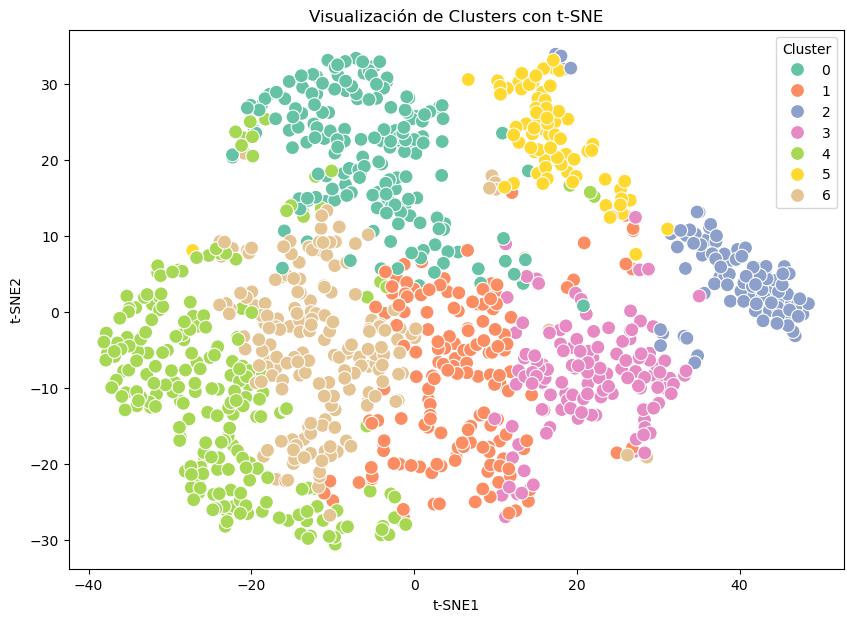

In [1195]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

# Reducir dimensiones con t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_results = tsne.fit_transform(genre_features_scaled)

# Agregar las coordenadas t-SNE al DataFrame
genre_features["tSNE1"] = tsne_results[:, 0]
genre_features["tSNE2"] = tsne_results[:, 1]

# Visualizar los clusters en 2D
plt.figure(figsize=(10, 7))
sns.scatterplot(data=genre_features, x="tSNE1", y="tSNE2", hue="Cluster", palette="Set2", s=100)
plt.title("Visualización de Clusters con t-SNE")
plt.xlabel("t-SNE1")
plt.ylabel("t-SNE2")
plt.legend(title="Cluster", loc="upper right")
plt.show()

plt.show()


In [1196]:
df_combined2["SuperGenre"].value_counts()

SuperGenre
1    37455
6    34543
0    21051
3    12025
4     8612
2     6443
5     1863
Name: count, dtype: int64

In [1197]:
# Opcional: Guardar el DataFrame descodificado en un archivo CSV
df_combined2.to_csv("asignar_genero.csv", index=False)

## ASIGNAR NOMBRE A CADA CLUSTER,

In [1199]:
# Agrupar por "SuperGenre" y calcular las características promedio para cada cluster
cluster_summary = df_combined2.groupby("SuperGenre")[["danceability", "energy", "acousticness", "valence", "tempo"]].mean()

# Agregar una columna con los géneros presentes en cada cluster
cluster_summary["Track_Genres"] = df_combined2.groupby("SuperGenre")["track_genre"].apply(lambda x: list(set(x)))

# Mostrar el resumen de los clusters
cluster_summary.reset_index(inplace=True)
cluster_summary.head()


,SuperGenre,danceability,energy,acousticness,valence,tempo,Track_Genres
0,0,0.513853,0.780170,0.105686,0.429951,128.440995,"[modern rock, brutal deathcore, german post-ha..."
1,1,0.599038,0.611642,0.359867,0.525805,121.023787,"[modern alternative rock, classic rock, acoust..."
2,2,0.347391,0.213604,0.803022,0.198132,104.527425,"[classify, choral, environmental, instrumental..."
3,3,0.544290,0.451135,0.548961,0.401581,118.212309,"[classic opm, dream pop, indie poptimism, adul..."
4,4,0.709371,0.712458,0.274486,0.686098,124.468002,"[modern j-rock, disco, bass trap, dance rock, ..."


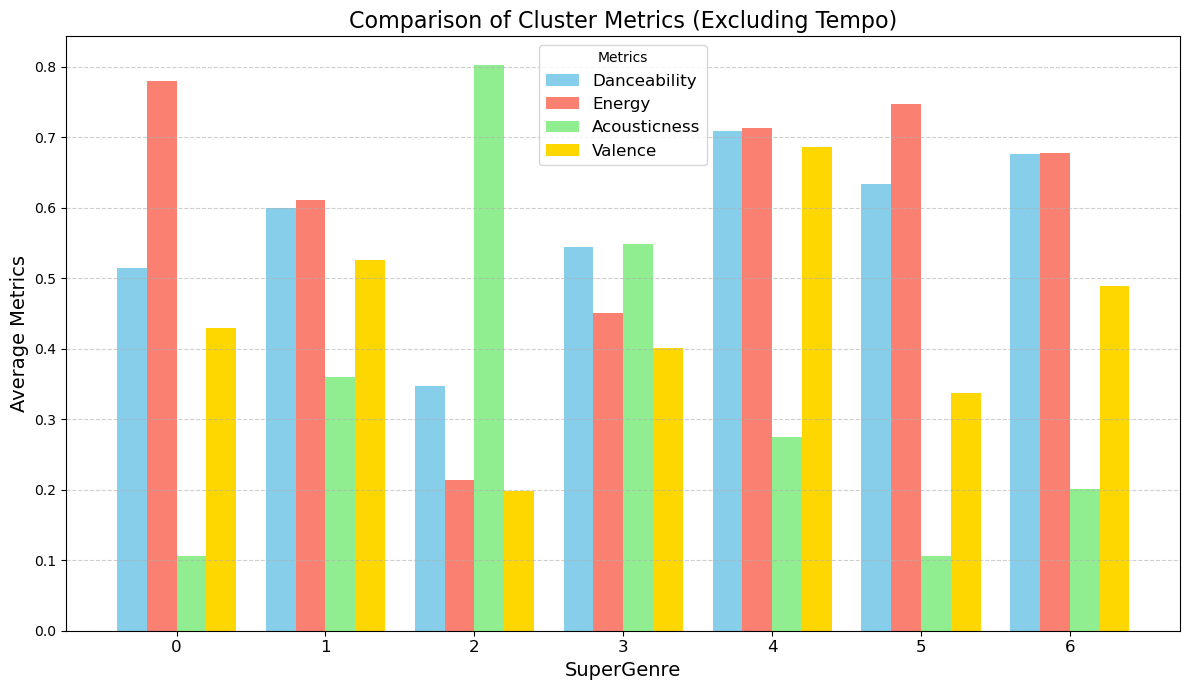

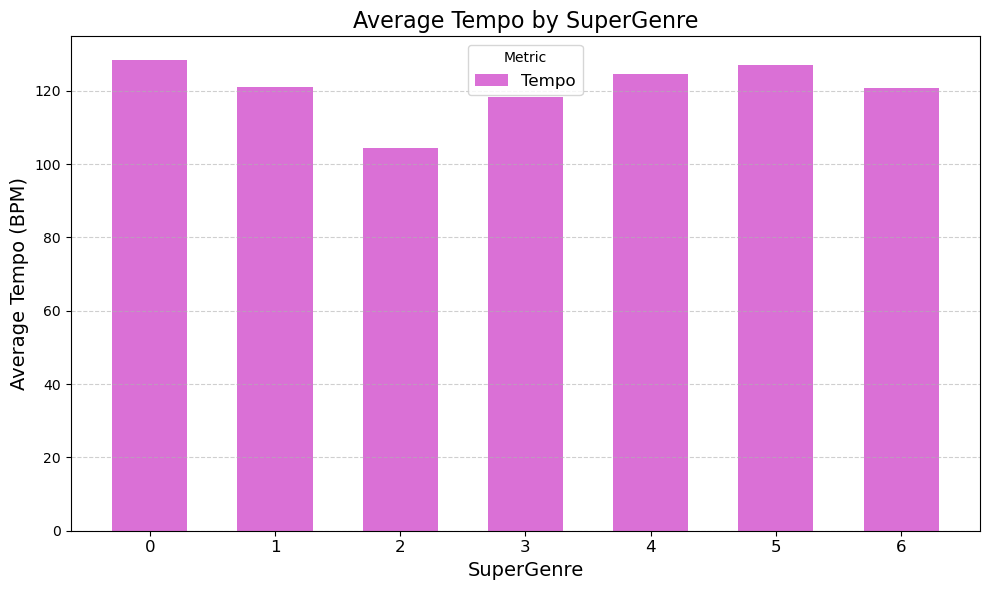

In [1200]:
# Verificar si el DataFrame 'df_combined2' tiene las columnas necesarias
if "SuperGenre" in df_combined2.columns and all(
    col in df_combined2.columns for col in ["danceability", "energy", "acousticness", "valence", "tempo"]
):
    # Agrupar por "SuperGenre" y calcular las características promedio para cada cluster
    cluster_summary = df_combined2.groupby("SuperGenre").agg({
        "danceability": "mean",
        "energy": "mean",
        "acousticness": "mean",
        "valence": "mean",
        "tempo": "mean",
    }).reset_index()

    # Gráfico 1: Danceability, Energy, Acousticness, Valence
    plt.figure(figsize=(12, 7))
    x = cluster_summary['SuperGenre']

    # Crear las barras para cada métrica excepto Tempo
    plt.bar(x - 0.3, cluster_summary['danceability'], width=0.2, label='Danceability', color='skyblue')
    plt.bar(x - 0.1, cluster_summary['energy'], width=0.2, label='Energy', color='salmon')
    plt.bar(x + 0.1, cluster_summary['acousticness'], width=0.2, label='Acousticness', color='lightgreen')
    plt.bar(x + 0.3, cluster_summary['valence'], width=0.2, label='Valence', color='gold')

    # Configurar etiquetas y leyenda
    plt.xlabel('SuperGenre', fontsize=14)
    plt.ylabel('Average Metrics', fontsize=14)
    plt.title('Comparison of Cluster Metrics (Excluding Tempo)', fontsize=16)
    plt.xticks(x, labels=x, fontsize=12)
    plt.legend(title='Metrics', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()

    # Gráfico 2: Tempo
    plt.figure(figsize=(10, 6))

    # Crear barras solo para Tempo
    plt.bar(x, cluster_summary['tempo'], color='orchid', width=0.6, label='Tempo')

    # Configurar etiquetas y leyenda
    plt.xlabel('SuperGenre', fontsize=14)
    plt.ylabel('Average Tempo (BPM)', fontsize=14)
    plt.title('Average Tempo by SuperGenre', fontsize=16)
    plt.xticks(x, labels=x, fontsize=12)
    plt.legend(title='Metric', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()
else:
    print("El DataFrame 'df_combined2' no contiene las columnas necesarias.")


## Cluster 0
Géneros listados: Alt-rock, black-metal, death-metal, drum-and-bass, dubstep.
Métricas clave:
Danceability: Moderada (0.51).
Energy: Alta (0.78).
Acousticness: Muy baja (0.10).
Valence: Emociones mixtas (0.43).
Tempo: Rápido (128 BPM).
Descripción ajustada: Este cluster incluye géneros que combinan intensidad (metal) con elementos electrónicos como drum-and-bass y dubstep.
## Nombre final: "Rock Electrónico y Energético".

## Cluster 1
Géneros listados: Anime, blues, brazil, british, chill, comedy, country.
Métricas clave:
Danceability: Alta (0.60).
Energy: Moderada (0.61).
Acousticness: Media (0.36).
Valence: Moderadamente positiva (0.52).
Tempo: Moderado (121 BPM).
Descripción ajustada: La mezcla de géneros culturales como brazil y british, combinados con estilos relajados (chill) y emotivos como el blues y anime.
## Nombre final: "Música Cultural y Melódica".

## Cluster 2
Géneros listados: Ambient, classical, guitar, IDM, new-age, piano.
Métricas clave:
Danceability: Baja (0.35).
Energy: Muy baja (0.21).
Acousticness: Muy alta (0.80).
Valence: Baja y melancólica (0.19).
Tempo: Lento (104 BPM).
Descripción ajustada: Este cluster se enfoca en géneros introspectivos e instrumentales, como piano y música clásica contemporánea.
## Nombre final: "Ambiental y Relajante".

## Cluster 3
Géneros listados: Acoustic, bluegrass, cantopop, disney, folk.
Métricas clave:
Danceability: Moderada (0.54).
Energy: Baja (0.45).
Acousticness: Alta (0.55).
Valence: Neutra o melancólica (0.40).
Tempo: Moderado (118 BPM).
Descripción ajustada: Incluye géneros melódicos, tradicionales y nostálgicos como bluegrass, folk y cantopop.
## Nombre final: "Acústica y Nostálgica"

## Cluster 4
Géneros listados: Afrobeat, chicago-house, children, dancehall, disco.
Métricas clave:
Danceability: Muy alta (0.71).
Energy: Alta (0.71).
Acousticness: Baja (0.27).
Valence: Alegre y positiva (0.69).
Tempo: Rápido (124 BPM).
Descripción ajustada: Este cluster destaca por su carácter bailable y festivo, ideal para géneros globales como afrobeat y disco.
## Nombre final: "Ritmos Globales y Festivos".

## Cluster 5
Géneros listados: Deep disco house, noise pop, rain, indie soul.
Métricas clave:
Danceability: Alta (0.63).
Energy: Alta (0.75).
Acousticness: Muy baja (0.10).
Valence: Emocionalmente compleja (0.34).
Tempo: Rápido (127 BPM).
Descripción ajustada: Predominan los géneros electrónicos como house y noise pop, orientados al baile y al pop alternativo.
## Nombre final: "Electrónica y House Alternativo".

## Cluster 6
Géneros listados: West coast trap, reggaetón chileno, k-rap, french hip hop.
Métricas clave:
Danceability: Muy alta (0.68).
Energy: Alta (0.68).
Acousticness: Baja (0.20).
Valence: Neutra (0.49).
Tempo: Moderado (121 BPM).
Descripción ajustada: Incluye géneros urbanos y modernos como trap, reggaetón y hip hop, con un enfoque global.
## Nombre final: "Pop Urbano y Ritmos Modernos".

In [1208]:
df_combined2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121992 entries, 0 to 1159051
Data columns (total 19 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          121992 non-null  object 
 1   artists           121992 non-null  object 
 2   track_name        121992 non-null  object 
 3   popularity        121992 non-null  float64
 4   duration_ms       121992 non-null  float64
 5   danceability      121992 non-null  float64
 6   energy            121992 non-null  float64
 7   key               121992 non-null  float64
 8   loudness          121992 non-null  float64
 9   mode              121992 non-null  float64
 10  speechiness       121992 non-null  float64
 11  acousticness      121992 non-null  float64
 12  instrumentalness  121992 non-null  float64
 13  liveness          121992 non-null  float64
 14  valence           121992 non-null  float64
 15  tempo             121992 non-null  float64
 16  time_signature    121992

## MATRIZ DE CORRELACIÓN

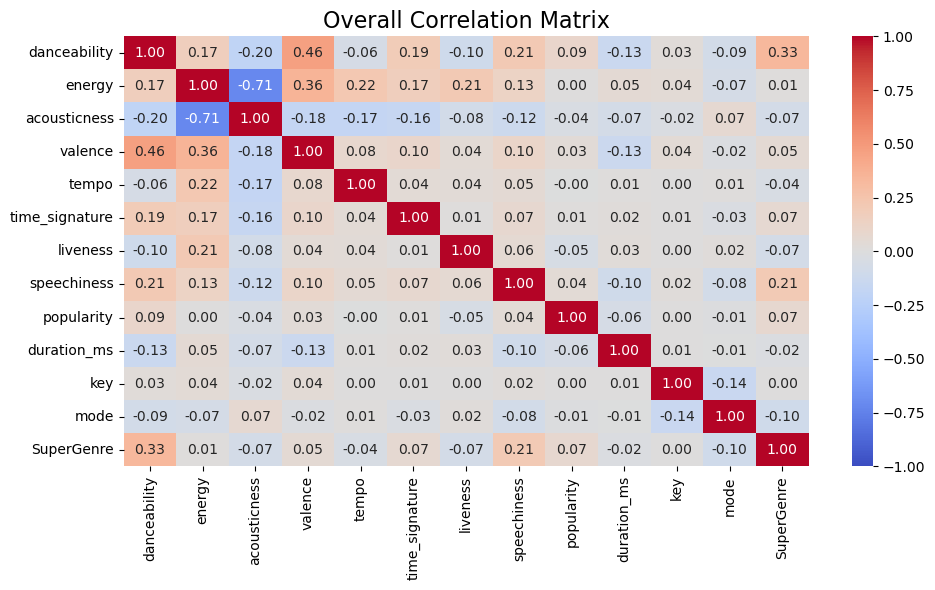

In [1210]:
# Verificar si el DataFrame contiene las columnas necesarias para la matriz de correlación global
required_columns = ["danceability", "energy", "acousticness", "valence", "tempo",
                    "time_signature","liveness","speechiness","popularity","duration_ms","key","mode","SuperGenre"]
if all(col in df_combined2.columns for col in required_columns):
    # Crear una matriz de correlación global entre las características
    overall_correlation_matrix = df_combined2[required_columns].corr()

    # Mostrar la matriz de correlación global
    plt.figure(figsize=(10, 6))
    sns.heatmap(overall_correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
    plt.title('Overall Correlation Matrix', fontsize=16)
    plt.tight_layout()
    plt.show()
else:
    print("El DataFrame no contiene todas las columnas necesarias:", required_columns)


Analizando la matriz:

#### Eliminar: time_signature, key, y mode por su baja correlación con las demás variables (casi 0).

#### Correlación alta: energy y acousticness tienen una relación negativa fuerte (-0.71); podría eliminarse una si no aporta información única.
#### Relación moderada: valence y danceability (0.46) son complementarias y podrían mantenerse. Esto simplifica el análisis manteniendo lo más relevante.

### Eliminar Variables irrelevantes

In [1213]:
# Eliminar columnas con baja relevancia: 'time_signature', 'key', y 'mode'
columns_to_drop = ['time_signature', 'key', 'mode']

if all(col in df_combined2.columns for col in columns_to_drop):
    df_combined2 = df_combined2.drop(columns=columns_to_drop)
    print(f"Columnas eliminadas: {columns_to_drop}")
    print(f"Columnas restantes: {df_combined2.columns.tolist()}")
else:
    print("Algunas de las columnas a eliminar no están presentes en el DataFrame.")


Columnas eliminadas: ['time_signature', 'key', 'mode']
Columnas restantes: ['track_id', 'artists', 'track_name', 'popularity', 'duration_ms', 'danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'track_genre', 'SuperGenre']


In [1214]:
df_combined2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 121992 entries, 0 to 1159051
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          121992 non-null  object 
 1   artists           121992 non-null  object 
 2   track_name        121992 non-null  object 
 3   popularity        121992 non-null  float64
 4   duration_ms       121992 non-null  float64
 5   danceability      121992 non-null  float64
 6   energy            121992 non-null  float64
 7   loudness          121992 non-null  float64
 8   speechiness       121992 non-null  float64
 9   acousticness      121992 non-null  float64
 10  instrumentalness  121992 non-null  float64
 11  liveness          121992 non-null  float64
 12  valence           121992 non-null  float64
 13  tempo             121992 non-null  float64
 14  track_genre       121992 non-null  object 
 15  SuperGenre        121992 non-null  int64  
dtypes: float64(11), int64(1)

In [1215]:
df_combined2 = df_combined2.drop(columns=['duration_ms'])


## NOMBRAR CLUSTERS

In [1217]:
# Diccionario para mapear los valores
cluster_mapping = {
    0: "Rock Electrónico y Energético",
    1: "Música Cultural y Melódica",
    2: "Ambiental y Relajante",
    3: "Acústica y Nostálgica",
    4: "Ritmos Globales y Festivos",
    5: "Electrónica y House Alternativo",
    6: "Pop Urbano y Ritmos Modernos",
}

# Renombrar los valores en la columna 'cluster'
df_combined2['SuperGenre'] = df_combined2['SuperGenre'].map(cluster_mapping)


In [1218]:
df_combined2['SuperGenre'].value_counts()

SuperGenre
Música Cultural y Melódica         37455
Pop Urbano y Ritmos Modernos       34543
Rock Electrónico y Energético      21051
Acústica y Nostálgica              12025
Ritmos Globales y Festivos          8612
Ambiental y Relajante               6443
Electrónica y House Alternativo     1863
Name: count, dtype: int64